# Remote Sensing in Agriculture:
## Leveraging Cloud Technologies for Earth System Data Management

Welcome to the notebook of the workshop. Here you will find:

1. Installation of dependencies
2. Connecting to a STAC catalog (in this example, the one from Microsoft: Planetary Computer)
3. Performing a data search for a specific collection
4. Downloading and visualizing the data
5. Computing spectral indices

If you have further questions after the workshop, feel free to contact me at david.montero@uni-leipzig.de

### 1. Installation of Dependencies

---

You just need to run the following cell to install the required dependencies for this workshop:

In [ ]:
!pip install odc-stac matplotlib cubo tqdm spyndex pyarrow

### 2. Connecting to a STAC Catalog

---

We use `pystac_client` to access public STAC catalogs.

In [2]:
from pystac_client import Client

We are going to work with the public STAC Catalog from Microsoft (Planetary Computer): [https://planetarycomputer.microsoft.com/](https://planetarycomputer.microsoft.com/)

Note that we need the API endpoint of the Catalog: [https://planetarycomputer.microsoft.com/api/stac/v1](https://planetarycomputer.microsoft.com/api/stac/v1)

Planetary Computer (PC) has its own package. We will need this to "sign" each item we want to download.

In [3]:
import planetary_computer as pc

Then, we can open the catalog:

In [4]:
client = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")
print(f"{client.title}: {client.description}")

Microsoft Planetary Computer STAC API: Searchable spatiotemporal metadata describing Earth science datasets hosted by the Microsoft Planetary Computer


We can check the JSON structure of the Catalog.

In [5]:
client.to_dict()

{'type': 'Catalog',
 'id': 'microsoft-pc',
 'stac_version': '1.1.0',
 'description': 'Searchable spatiotemporal metadata describing Earth science datasets hosted by the Microsoft Planetary Computer',
 'links': [{'rel': 'self',
   'href': 'https://planetarycomputer.microsoft.com/api/stac/v1',
   'type': 'application/json'},
  {'rel': 'root',
   'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/',
   'type': 'application/json',
   'title': 'Microsoft Planetary Computer STAC API'},
  {'rel': 'data',
   'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections',
   'type': 'application/json'},
  {'rel': 'conformance',
   'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/conformance',
   'type': 'application/json',
   'title': 'STAC/OGC conformance classes implemented by this server'},
  {'rel': 'search',
   'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/search',
   'type': 'application/geo+json',
   'title': 'STAC search',
   'method': 'GE

Let's print the collections in this Catalog.

**IMPORTANT**: Not all datasets are public, check the catalog for more info [https://planetarycomputer.microsoft.com/catalog](https://planetarycomputer.microsoft.com/catalog). To access all of them a TOKEN is required, you must sign-up for this.

In [6]:
collections = [collection for collection in client.get_collections()]
for idx, col in enumerate(collections):
    print(f"[{idx}] (id: {col.id}) {col.title}")
    # Uncomment the following line (and comment the above one) to get titles and descriptions
    # print(f"[{idx}] (id: {col.id}) {col.title}: {col.description}")

[0] (id: daymet-annual-pr) Daymet Annual Puerto Rico
[1] (id: daymet-daily-hi) Daymet Daily Hawaii
[2] (id: 3dep-seamless) USGS 3DEP Seamless DEMs
[3] (id: 3dep-lidar-dsm) USGS 3DEP Lidar Digital Surface Model
[4] (id: fia) Forest Inventory and Analysis
[5] (id: sentinel-1-rtc) Sentinel 1 Radiometrically Terrain Corrected (RTC)
[6] (id: gridmet) gridMET
[7] (id: daymet-annual-na) Daymet Annual North America
[8] (id: daymet-monthly-na) Daymet Monthly North America
[9] (id: daymet-annual-hi) Daymet Annual Hawaii
[10] (id: daymet-monthly-hi) Daymet Monthly Hawaii
[11] (id: daymet-monthly-pr) Daymet Monthly Puerto Rico
[12] (id: gnatsgo-tables) gNATSGO Soil Database - Tables
[13] (id: hgb) HGB: Harmonized Global Biomass for 2010
[14] (id: cop-dem-glo-30) Copernicus DEM GLO-30
[15] (id: cop-dem-glo-90) Copernicus DEM GLO-90
[16] (id: terraclimate) TerraClimate
[17] (id: nasa-nex-gddp-cmip6) Earth Exchange Global Daily Downscaled Projections (NEX-GDDP-CMIP6)
[18] (id: gpm-imerg-hhr) GPM IMER

### 3. Performing a Data Search

---

We can filter a collection by space and also time. Let's define a geometry for our search.

In [7]:
geom = {
    "type": "Point",
    "coordinates": [11.272274605157698, 51.82773545454387] # IPK Gatersleben
}

Now we can use the endopoint to search through specific collections given a intersection with our feature and the specified datetime range.

In [8]:
search = client.search(
    collections = "sentinel-2-l2a", # Public COGs
    intersects = geom,
    datetime = "2018-05-01/2018-07-31",
    query = {"eo:cloud_cover": {"lt": 10}} # We can also specify cloud cover, useful for optical data!
)

Let's get all the items in the search.

In [9]:
items = list(search.item_collection())
items

[<Item id=S2B_MSIL2A_20180726T102019_R065_T32UPC_20201011T202303>,
 <Item id=S2A_MSIL2A_20180724T103021_R108_T32UPC_20201011T192553>,
 <Item id=S2B_MSIL2A_20180719T103019_R108_T32UPC_20201011T174158>,
 <Item id=S2A_MSIL2A_20180714T103021_R108_T32UPC_20201011T153920>,
 <Item id=S2A_MSIL2A_20180704T103021_R108_T32UPC_20201011T115020>,
 <Item id=S2A_MSIL2A_20180701T102021_R065_T32UPC_20201011T104303>,
 <Item id=S2B_MSIL2A_20180606T102019_R065_T32UPC_20201026T173756>,
 <Item id=S2A_MSIL2A_20180522T102031_R065_T32UPC_20201012T125354>,
 <Item id=S2B_MSIL2A_20180520T103019_R108_T32UPC_20201012T121508>,
 <Item id=S2B_MSIL2A_20180507T102019_R065_T32UPC_20201012T070447>]

Now, we need to "sign" the items (in other words: data is stored privately, signing creates an access token)

In [10]:
items = [pc.sign(item) for item in items]

Print all the properties of one Item. It is a GeoJSON Feature.

In [11]:
# items[0].to_dict()

Get the Bounding Box of the first item.

In [12]:
items[0].bbox

[10.43612062512346, 51.32452335478603, 12.077757925309447, 52.34135509726958]

Get the geometry of the first item.

In [13]:
items[0].geometry

{'type': 'Polygon',
 'coordinates': [[[10.46788415, 52.3413551],
   [12.07775793, 52.31036691],
   [12.01125412, 51.32452335],
   [10.43612063, 51.35443939],
   [10.46788415, 52.3413551]]]}

Get the properties of the first item.

In [14]:
items[0].properties

{'datetime': '2018-07-26T10:20:19.024000Z',
 'platform': 'Sentinel-2B',
 'instruments': ['msi'],
 's2:mgrs_tile': '32UPC',
 'constellation': 'Sentinel 2',
 's2:granule_id': 'S2B_OPER_MSI_L2A_TL_ESRI_20201011T202306_A007241_T32UPC_N02.12',
 'eo:cloud_cover': 3.741136,
 's2:datatake_id': 'GS2B_20180726T102019_007241_N02.12',
 's2:product_uri': 'S2B_MSIL2A_20180726T102019_N0212_R065_T32UPC_20201011T202303.SAFE',
 's2:datastrip_id': 'S2B_OPER_MSI_L2A_DS_ESRI_20201011T202306_S20180726T102150_N02.12',
 's2:product_type': 'S2MSI2A',
 'sat:orbit_state': 'descending',
 's2:datatake_type': 'INS-NOBS',
 's2:generation_time': '2020-10-11T20:23:03.904Z',
 'sat:relative_orbit': 65,
 's2:water_percentage': 0.503318,
 's2:mean_solar_zenith': 34.1938741882374,
 's2:mean_solar_azimuth': 156.447555916631,
 's2:processing_baseline': '02.12',
 's2:snow_ice_percentage': 0.000829,
 's2:vegetation_percentage': 42.745569,
 's2:thin_cirrus_percentage': 3.563674,
 's2:cloud_shadow_percentage': 0.032077,
 's2:nod

Get the assets of the first item.

In [15]:
items[0].assets

{'AOT': <Asset href=https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/32/U/PC/2018/07/26/S2B_MSIL2A_20180726T102019_N0212_R065_T32UPC_20201011T202303.SAFE/GRANULE/L2A_T32UPC_A007241_20180726T102150/IMG_DATA/R10m/T32UPC_20180726T102019_AOT_10m.tif?st=2025-06-25T09%3A01%3A59Z&se=2025-06-27T09%3A01%3A59Z&sp=rl&sv=2024-05-04&sr=c&skoid=9c8ff44a-6a2c-4dfb-b298-1c9212f64d9a&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2025-06-26T00%3A52%3A45Z&ske=2025-07-03T00%3A52%3A45Z&sks=b&skv=2024-05-04&sig=hGXU295YHvAB%2BHU0JkoAjunUMXhq5O/FZdYpT5i7/a4%3D>,
 'B01': <Asset href=https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/32/U/PC/2018/07/26/S2B_MSIL2A_20180726T102019_N0212_R065_T32UPC_20201011T202303.SAFE/GRANULE/L2A_T32UPC_A007241_20180726T102150/IMG_DATA/R60m/T32UPC_20180726T102019_B01_60m.tif?st=2025-06-25T09%3A01%3A59Z&se=2025-06-27T09%3A01%3A59Z&sp=rl&sv=2024-05-04&sr=c&skoid=9c8ff44a-6a2c-4dfb-b298-1c9212f64d9a&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2025-06-26T00%3A52

### 4. Downloading and Visualizing Data

---

Note that the bands of the image are stored in a S3 bucket.

In [16]:
items[0].assets['B08'].href

'https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/32/U/PC/2018/07/26/S2B_MSIL2A_20180726T102019_N0212_R065_T32UPC_20201011T202303.SAFE/GRANULE/L2A_T32UPC_A007241_20180726T102150/IMG_DATA/R10m/T32UPC_20180726T102019_B08_10m.tif?st=2025-06-25T09%3A01%3A59Z&se=2025-06-27T09%3A01%3A59Z&sp=rl&sv=2024-05-04&sr=c&skoid=9c8ff44a-6a2c-4dfb-b298-1c9212f64d9a&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2025-06-26T00%3A52%3A45Z&ske=2025-07-03T00%3A52%3A45Z&sks=b&skv=2024-05-04&sig=hGXU295YHvAB%2BHU0JkoAjunUMXhq5O/FZdYpT5i7/a4%3D'

But since we are using COGs, we can request the data without downloading it.

We can even request `partial` data.

In [17]:
import odc.stac

The Items are loaded as a `xarray.Dataset`, with each Asset as a `xarray.DataArray`. We can select the Assets we need and also define chunks for the dimensions `[x, y, time]` if required. CRS and resolution should always be defined.

Let's create a Bounding Box for Gatersleben, we will retrive data just inside this box:

In [18]:
bbox = [11.26545563412128, 51.82019607087685, 11.2969824293424, 51.834687647944705] # BBox for Gatersleben

Here we specify what we want to retrieve: bands, resolution, reference system:

In [19]:
data = odc.stac.load(
    items,
    bands=['B02','B03','B04','B05','B06','B07','B08'],
    chunks=dict(x=512,y=512,time=-1),
    bbox=bbox,
    crs="EPSG:32632",
    resolution=10,
)

data

<xarray.Dataset> Size: 11MB
Dimensions:      (y: 169, x: 224, time: 10)
Coordinates:
  * y            (y) float64 1kB 5.745e+06 5.745e+06 ... 5.743e+06 5.743e+06
  * x            (x) float64 2kB 6.561e+05 6.561e+05 ... 6.583e+05 6.583e+05
    spatial_ref  int32 4B 32632
  * time         (time) datetime64[ns] 80B 2018-05-07T10:20:19.027000 ... 201...
Data variables:
    B02          (time, y, x) float32 2MB dask.array<chunksize=(10, 169, 224), meta=np.ndarray>
    B03          (time, y, x) float32 2MB dask.array<chunksize=(10, 169, 224), meta=np.ndarray>
    B04          (time, y, x) float32 2MB dask.array<chunksize=(10, 169, 224), meta=np.ndarray>
    B05          (time, y, x) float32 2MB dask.array<chunksize=(10, 169, 224), meta=np.ndarray>
    B06          (time, y, x) float32 2MB dask.array<chunksize=(10, 169, 224), meta=np.ndarray>
    B07          (time, y, x) float32 2MB dask.array<chunksize=(10, 169, 224), meta=np.ndarray>
    B08          (time, y, x) float32 2MB dask.array<chunksize=(10, 169, 224), meta=np.ndarray>

Let's plot an image to check everything is okay.

In [20]:
def plot_rgb(ds, bands=['B04','B03','B02'], time_idx="2018-06-01", vmax=0.2):
    """Plots a False Color image."""
    
    da = ds[bands].to_array(dim='band').sel(time=time_idx, method="nearest") 
    da = da.transpose("y","x","band")
    da = ((da*0.0001)/vmax).clip(0,1)
    da.plot.imshow()

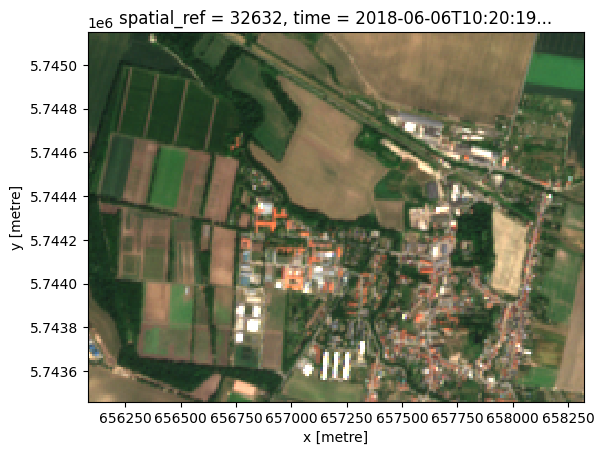

In [21]:
plot_rgb(data, time_idx="2018-06-06")

Everything looks good! Let's get all of the images:

In [22]:
data = data.compute()

/net/home/dmontero/.conda/envs/pssc25/lib/python3.12/site-packages/rasterio/warp.py:387: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dest = _reproject(


Restructure the dataset for an easy management (not necessary, but useful for visualization and other stuff)

In [23]:
da = data.to_array("band").transpose("time","band","y","x")

Let's plot all of our images:

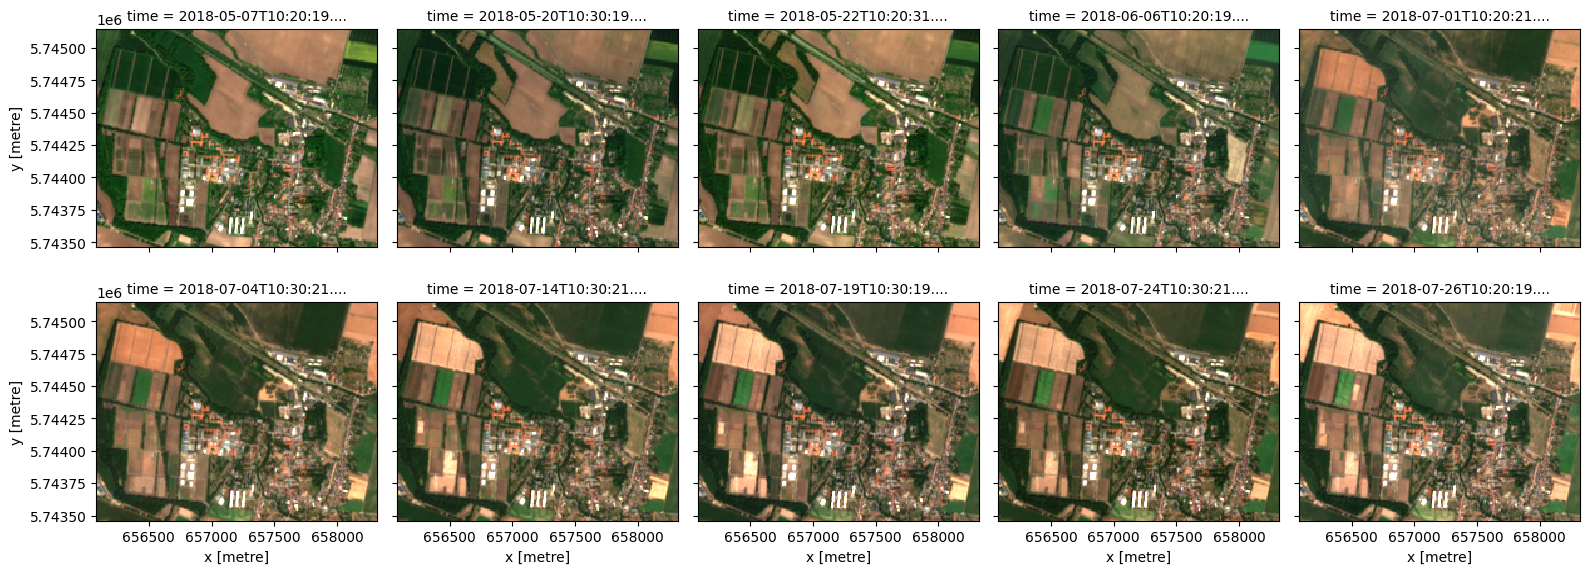

In [24]:
(da.sel(band=["B04","B03","B02"])/2000).clip(0,1).plot.imshow(col="time",col_wrap = 5)

### 5. Computing Spectral Indices

---

There are hundreds of spectral indices that we can compute. For a comprehensive list, you can visit [Awesome Spectral Indices](https://github.com/awesome-spectral-indices/awesome-spectral-indices).

In [25]:
import spyndex

First, and important, we need to scale our data. Reflectance data goes from 0 to 1.

In [28]:
da = da * 0.0001

Now, let's compute 3 indices:

1. NDVI (Normalized Difference Vegetation Index): Most popular index. Useful for identifying vegetation cover.
2. NIRv (Near Infrared Reflectance of Vegetation): Novel structural index. Useful for fAPAR.
3. IRECI (Inverted Red Edge Chlorophyll Index): Uses red-edge to detect chlorophyll. 

In [44]:
idx = spyndex.computeIndex(
    index = ["NDVI","IRECI","NIRv"],
    N = da.sel(band = "B08"),
    R = da.sel(band = "B04"),
    RE1 = da.sel(band = "B05"),
    RE2 = da.sel(band = "B06"),
    RE3 = da.sel(band = "B07")
)

idx

<xarray.DataArray (index: 3, time: 10, y: 169, x: 224)> Size: 5MB
array([[[[0.76368284, 0.775739  , 0.7707391 , ..., 0.9157733 ,
          0.92805755, 0.9063829 ],
         [0.73696494, 0.7435631 , 0.7453979 , ..., 0.92304707,
          0.9276563 , 0.9007833 ],
         [0.7364988 , 0.7295613 , 0.74156713, ..., 0.9269729 ,
          0.9230622 , 0.89638686],
         ...,
         [0.1752137 , 0.1863517 , 0.17340426, ..., 0.60183764,
          0.6708737 , 0.5787815 ],
         [0.18467268, 0.17733471, 0.17762817, ..., 0.6057201 ,
          0.61091095, 0.50945497],
         [0.18172267, 0.17707795, 0.1755567 , ..., 0.557047  ,
          0.52100843, 0.37746924]],

        [[0.836478  , 0.8184561 , 0.82112175, ..., 0.9407317 ,
          0.9404256 , 0.9231385 ],
         [0.8384654 , 0.82808167, 0.84053993, ..., 0.94206446,
          0.9335248 , 0.92078805],
         [0.8406814 , 0.8296593 , 0.8521092 , ..., 0.940594  ,
          0.9285565 , 0.925187  ],
...
         [0.2309664 , 0.23237196, 0.27224392, ..., 0.08642185,
          0.08702553, 0.10668409],
         [0.22389086, 0.22811267, 0.23787922, ..., 0.06693438,
          0.0698882 , 0.09239671],
         [0.21649805, 0.2047937 , 0.18769036, ..., 0.06838134,
          0.06245288, 0.06093707]],

        [[0.05533347, 0.05417572, 0.05198616, ..., 0.06639788,
          0.05116604, 0.06148025],
         [0.05622224, 0.05432816, 0.05213567, ..., 0.06471056,
          0.05255879, 0.06172989],
         [0.05598174, 0.0533053 , 0.05298648, ..., 0.06403953,
          0.05541281, 0.05701427],
         ...,
         [0.20562606, 0.23049678, 0.29323134, ..., 0.11424109,
          0.10774528, 0.12651314],
         [0.21603964, 0.23394275, 0.25567982, ..., 0.07434469,
          0.08910912, 0.12341467],
         [0.19909865, 0.18804844, 0.17505805, ..., 0.067461  ,
          0.07411726, 0.07055571]]]], dtype=float32)
Coordinates:
  * y        (y) float64 1kB 5.745e+06 5.745e+06 ... 5.743e+06 5.743e+06
  * x        (x) float64 2kB 6.561e+05 6.561e+05 ... 6.583e+05 6.583e+05
  * time     (time) datetime64[ns] 80B 2018-05-07T10:20:19.027000 ... 2018-07...
  * index    (index) <U5 60B 'NDVI' 'IRECI' 'NIRv'

Now, let's visualize them.

Here the NDVI:

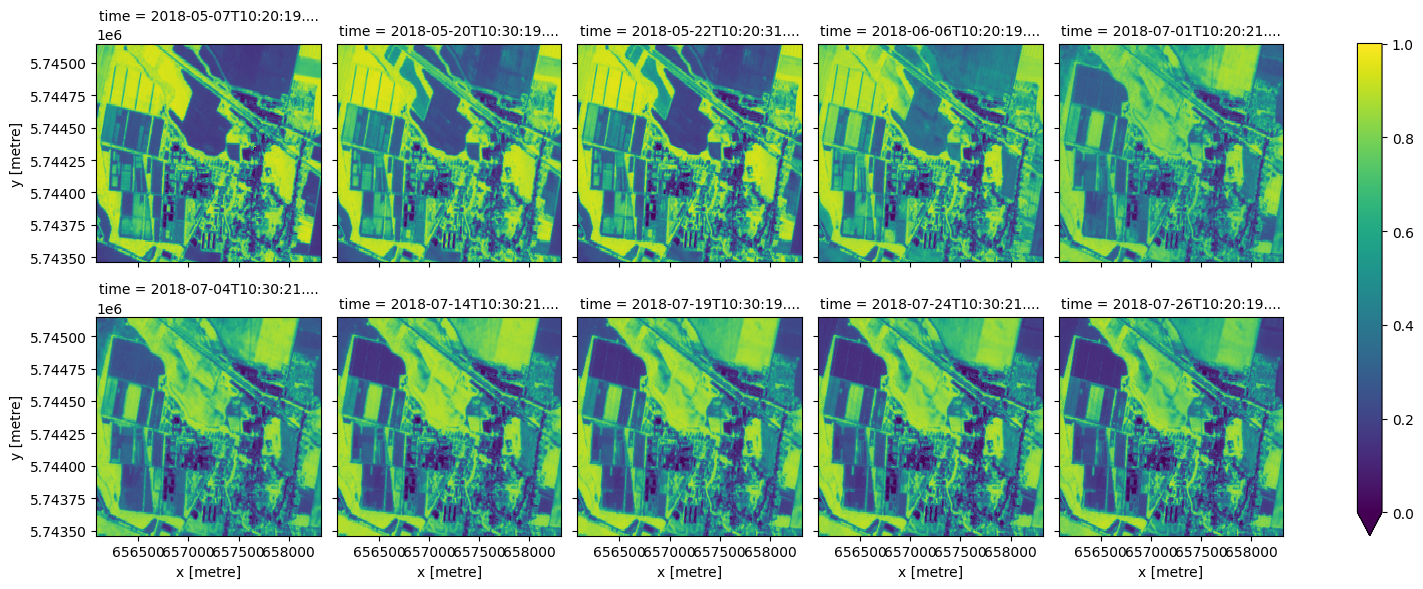

In [35]:
idx.sel(index=["NDVI"]).plot(col="time",col_wrap = 5,cmap = "viridis",vmin = 0,vmax = 1)

Now let's visualize the NIRv:

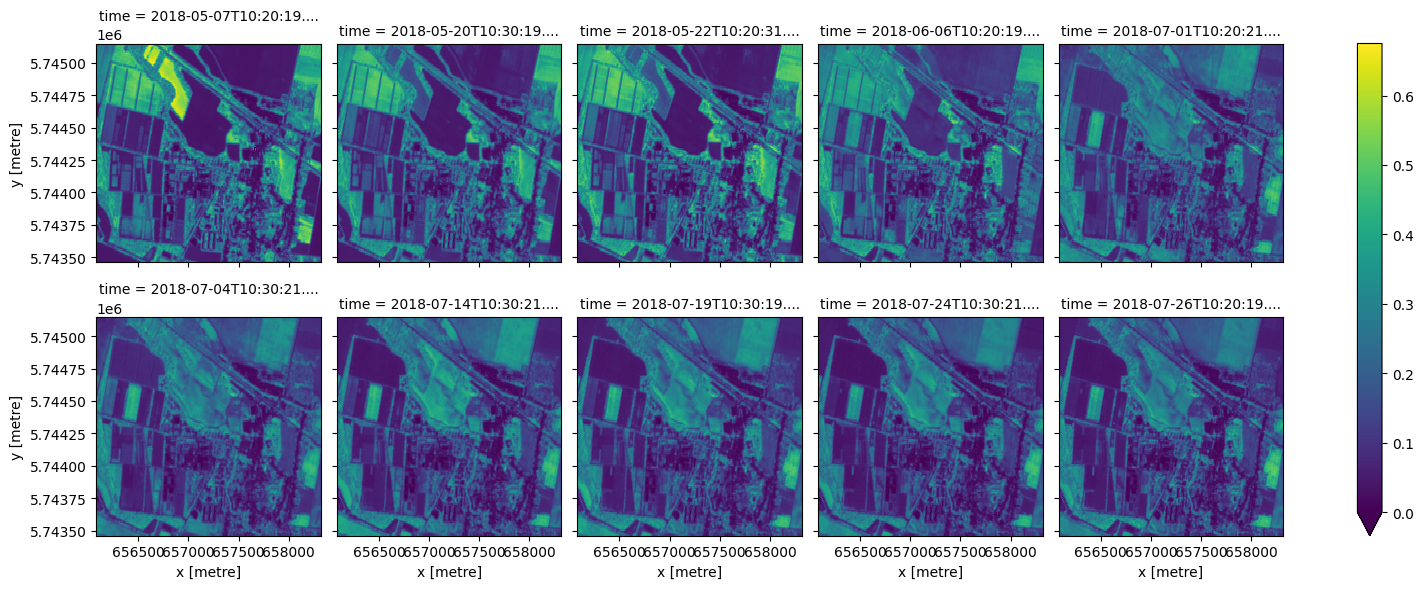

In [38]:
idx.sel(index=["NIRv"]).plot(col="time",col_wrap = 5,cmap = "viridis",vmin = 0)

And finally, let's visualize IRECI:

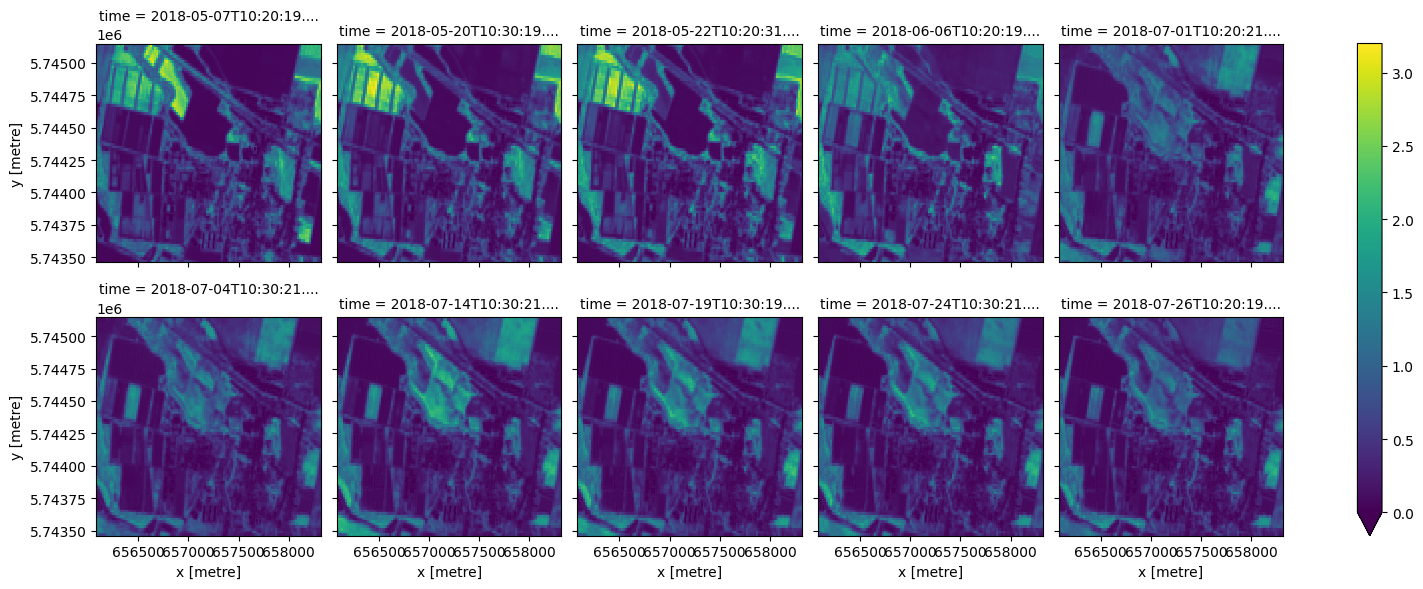

In [37]:
idx.sel(index=["IRECI"]).plot(col="time",col_wrap = 5,cmap = "viridis",vmin = 0)